In [2]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=1d99f14d761c3afae10a944c58b0e6303f43719192a86420affb45635131023b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_temp=np.arange(-20,20.1,0.1)
x_vazao=np.arange(-1.0,1.1,0.1)
x_val_f=np.arange(-1.0,1.1,0.1)
x_val_q=np.arange(-1.0,1.1,0.1)

In [28]:
val_temp=[-10,-10,-10,0,0,0,10,10,10]
val_vazao=[-0.5,0,0.5,-0.5,0,0.5,-0.5,0,0.5]
print(val_temp)
print(val_vazao)

[-10, -10, -10, 0, 0, 0, 10, 10, 10]
[-0.5, 0, 0.5, -0.5, 0, 0.5, -0.5, 0, 0.5]


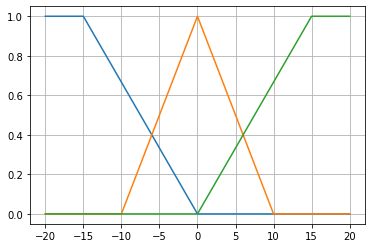

In [5]:
temp_lo=fuzz.trapmf(x_temp,[-21,-20,-15,0])
temp_me=fuzz.trimf(x_temp,[-10,0,10])
temp_hi=fuzz.trapmf(x_temp,[0 ,15,20,21])
plt.plot(x_temp,temp_lo)
plt.plot(x_temp,temp_me)
plt.plot(x_temp,temp_hi)
plt.grid()

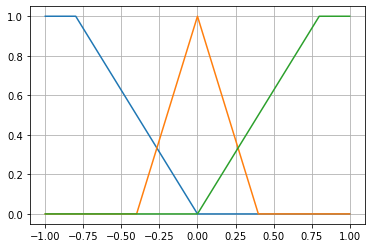

In [6]:
vazao_lo=fuzz.trapmf(x_vazao,[-1.0,-1.0,-0.8,0.0])
vazao_me=fuzz.trimf(x_vazao,[-0.4,0,0.4])
vazao_hi=fuzz.trapmf(x_vazao,[0 ,0.8,1,1])
plt.plot(x_vazao,vazao_lo)
plt.plot(x_vazao,vazao_me)
plt.plot(x_vazao,vazao_hi)
plt.grid()

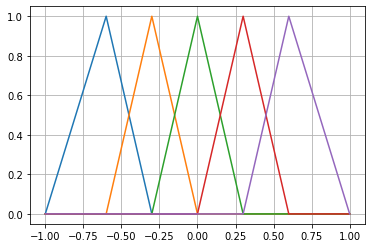

In [7]:
valv_f_lolo=fuzz.trimf(x_val_f,[-1.0,-0.6,-0.3])
valv_f_lo=fuzz.trimf(x_val_f,[-0.6,-0.3,0.0])
valv_f_mid=fuzz.trimf(x_val_f,[-0.3,-0.0,0.3])
valv_f_hi=fuzz.trimf(x_val_f,[-0.0,0.3,0.6])
valv_f_hihi=fuzz.trimf(x_val_f,[0.3,0.6,1.0])
plt.plot(x_val_f,valv_f_lolo)
plt.plot(x_val_f,valv_f_lo)
plt.plot(x_val_f,valv_f_mid)
plt.plot(x_val_f,valv_f_hi)
plt.plot(x_val_f,valv_f_hihi)
plt.grid()

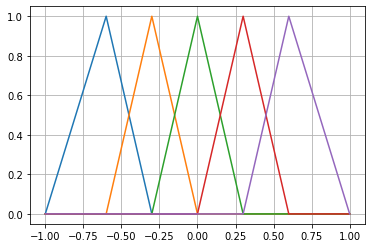

In [8]:
valv_q_lolo=fuzz.trimf(x_val_q,[-1.0,-0.6,-0.3])
valv_q_lo=fuzz.trimf(x_val_q,[-0.6,-0.3,0.0])
valv_q_mid=fuzz.trimf(x_val_q,[-0.3,-0.0,0.3])
valv_q_hi=fuzz.trimf(x_val_q,[-0.0,0.3,0.6])
valv_q_hihi=fuzz.trimf(x_val_q,[0.3,0.6,1.0])
plt.plot(x_val_q,valv_q_lolo)
plt.plot(x_val_q,valv_q_lo)
plt.plot(x_val_q,valv_q_mid)
plt.plot(x_val_q,valv_q_hi)
plt.plot(x_val_q,valv_q_hihi)
plt.grid()

In [9]:
temp_act_lo = fuzz.interp_membership(x_temp, temp_lo,-10.0)
temp_act_me = fuzz.interp_membership(x_temp, temp_me,-10.0)
temp_act_hi = fuzz.interp_membership(x_temp, temp_hi,-10.0)

print(temp_act_lo)
print(temp_act_me)
print(temp_act_hi)

0.6666666666666666
1.4210854715181809e-14
0.0


In [10]:
vazao_act_lo = fuzz.interp_membership(x_vazao, vazao_lo,-0.5)
vazao_act_me = fuzz.interp_membership(x_vazao, vazao_me,-0.5)
vazao_act_hi = fuzz.interp_membership(x_vazao, vazao_hi,-0.5)

print(vazao_act_lo)
print(vazao_act_me)
print(vazao_act_hi)

0.625
0.0
0.0


In [17]:
regra1_ant=np.fmin(temp_act_lo,vazao_act_lo)
regra1 = np.fmin(regra1_ant,valv_f_hi)
regra1_2 = np.fmin(regra1_ant,valv_q_hihi)

regra2_ant=np.fmin(temp_act_lo,vazao_act_me)
regra2 = np.fmin(regra2_ant,valv_f_lo)
regra2_2 = np.fmin(regra2_ant,valv_q_hi)

regra3_ant=np.fmin(temp_act_lo,vazao_act_hi)
regra3 = np.fmin(regra2_ant,valv_f_lolo)
regra3_2 = np.fmin(regra2_ant,valv_q_lo)

regra4_ant=np.fmin(temp_act_me,vazao_act_lo)
regra4 = np.fmin(regra2_ant,valv_f_hi)
regra4_2 = np.fmin(regra2_ant,valv_q_hi)

regra5_ant=np.fmin(temp_act_me,vazao_act_me)
regra5 = np.fmin(regra2_ant,valv_f_mid)
regra5_2 = np.fmin(regra2_ant,valv_q_mid)

regra6_ant=np.fmin(temp_act_me,vazao_act_hi)
regra6 = np.fmin(regra2_ant,valv_f_lo)
regra6_2 = np.fmin(regra2_ant,valv_q_lo)

regra7_ant=np.fmin(temp_act_hi,vazao_act_lo)
regra7 = np.fmin(regra2_ant,valv_f_hihi)
regra7_2 = np.fmin(regra2_ant,valv_q_hi)

regra8_ant=np.fmin(temp_act_hi,vazao_act_me)
regra8 = np.fmin(regra2_ant,valv_f_hi)
regra8_2 = np.fmin(regra2_ant,valv_q_lo)

regra9_ant=np.fmin(temp_act_hi,vazao_act_hi)
regra9 = np.fmin(regra2_ant,valv_f_lo)
regra9_2 = np.fmin(regra2_ant,valv_q_lolo)

In [18]:
agregado = np.fmax(regra1, np.fmax(regra2, np.fmax(regra3, np.fmax(regra4, np.fmax(regra5, np.fmax(regra6, np.fmax(regra7, np.fmax(regra8, regra9))))))))
agregado_2 = np.fmax(regra1_2, np.fmax(regra2_2, np.fmax(regra3_2, np.fmax(regra4_2, np.fmax(regra5_2, np.fmax(regra6_2, np.fmax(regra7_2, np.fmax(regra8_2, regra9_2))))))))

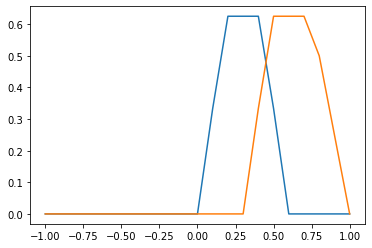

In [19]:
plt.plot(x_val_f,agregado)
plt.plot(x_val_q,agregado_2)

In [20]:
val_quente =fuzz.defuzz(x_val_q,agregado_2,'centroid')
val_fria=fuzz.defuzz(x_val_f,agregado,'centroid')

In [23]:
val_quente


0.636619718309859

In [25]:
val_fria


0.30000000000000004